In [2]:
#============================
#0) Imports & plotting setup
#============================
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from statsmodels.tsa.seasonal import seasonal_decompose, STL
from statsmodels.tsa.stattools import adfuller, kpss
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.stats.diagnostic import acorr_ljungbox

plt.rcParams["figure.figsize"] = (12, 5)
plt.rcParams["axes.grid"] = True

print("ready to go!")

ready to go!


In [11]:
#==============================
# 1) Load the data
#==============================
#Important
# Place car_sales.csv in the same directory as this script or provide the correct path
# If any where else set datapath to the correct location

datapath = "car_sales.csv"

df = pd.read_csv(datapath)
df['Month'] = pd.to_datetime(df['Month'])
df = df.sort_values('Month').set_index('Month')

y = df['Sales'].astype(float)
y.index.freq = pd.infer_freq(y.index) #sets frequency when regular

print('Shape:' , df.shape)
print('Frequency:' , pd.infer_freq(y.index))
#df.head()
df.tail()

Shape: (108, 1)
Frequency: MS


,Sales
Month,
1968-08-01,16722
1968-09-01,14385
1968-10-01,21342
1968-11-01,17180
1968-12-01,14577


count      108.000000
mean     14595.111111
std       4525.213913
min       5568.000000
25%      11391.250000
50%      14076.000000
75%      17595.750000
max      26099.000000
Name: Sales, dtype: float64

missing values: 0
Date range: 1960-01-01 00:00:00 -> 1968-12-01 00:00:00


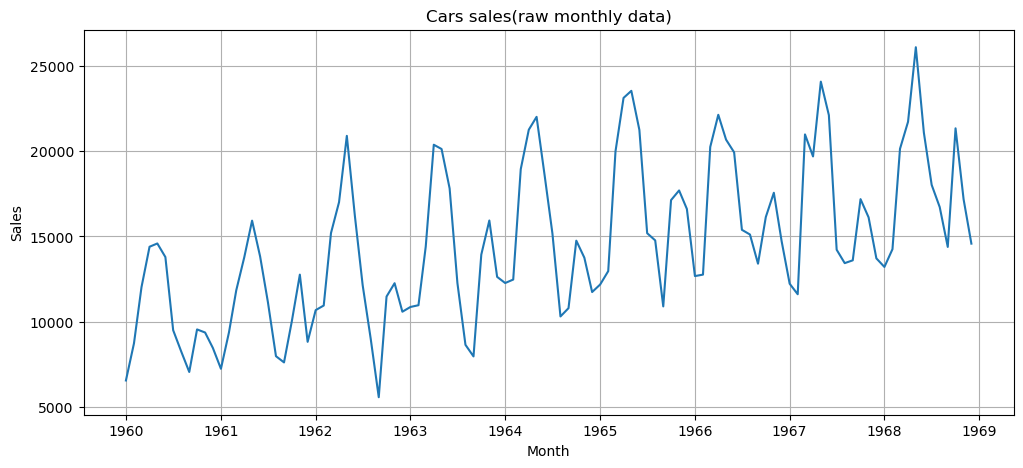

In [13]:
#======================================
# 3) Ploting raw data series and do EDA
#=====================================

# Basic Checks
display(y.describe())
print('missing values:', y.isna().sum())
print('Date range:',y.index.min(), '->', y.index.max())

# Raw Plot

plt.figure()
plt.plot(y)
plt.title('Cars sales(raw monthly data)')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.show()

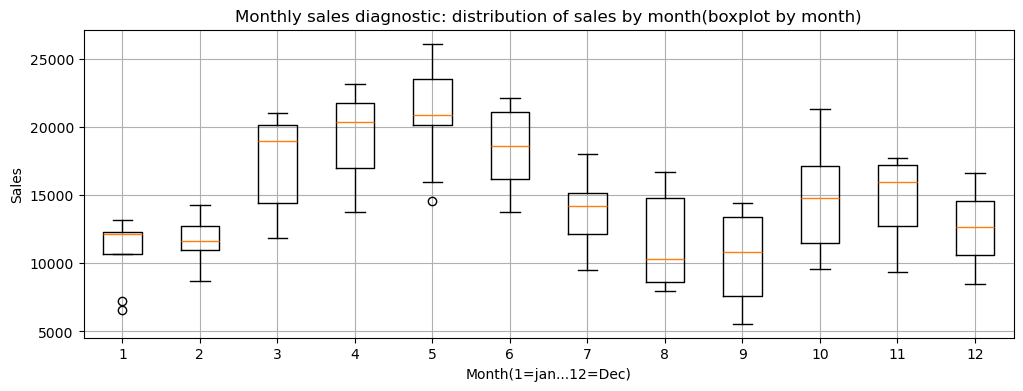

In [14]:
# Seasonality diagonstic: distribtion of sales by month

y_df = y.to_frame('Sales').copy()
y_df['month'] = y_df.index.month

months = range(1, 13)
data = [y_df.loc[y_df['month'] == m, 'Sales'].values for m in months]

plt.figure(figsize = (12, 4))
plt.boxplot(data, labels=[str(m) for m in months], showfliers=True)
plt.title('Monthly sales diagnostic: distribution of sales by month(boxplot by month)')
plt.xlabel('Month(1=jan...12=Dec)')
plt.ylabel('Sales')
plt.show()